In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

In [58]:
data = pd.read_csv('clean_data.csv')
data.head()

,year,Price,kms_driven,company_Audi,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,...,model_Volkswagen Passat Diesel,model_Volkswagen Polo,model_Volkswagen Polo Comfortline,model_Volkswagen Polo Highline,model_Volkswagen Polo Highline1.2L,model_Volkswagen Polo Trendline,model_Volkswagen Vento Comfortline,model_Volkswagen Vento Highline,model_Volkswagen Vento Konekt,model_Volvo S80 Summum
0,2007,80000,45000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006,425000,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,325000,28000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,575000,36000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012,175000,41000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [60]:
#TEST TRAIN SPLIT
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [61]:
#Standardize
standard = StandardScaler()
X_train[['year','kms_driven']]  = standard.fit_transform(X_train[['year','kms_driven']])
X_test[['year','kms_driven']] = standard.transform(X_test[['year','kms_driven']])

In [62]:
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, param_grid=params, cv=5)
model = ridge_cv.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pre_train = model.predict(X_train)
print(r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pre_train),mean_absolute_error(y_train,y_pre_train),mean_squared_error(y_train,y_pre_train))
residuals = y_test-y_pred

0.6279582373131867 82541.36676992604 15241228737.832865
0.8923863827598523 40766.80968308829 4225669441.9566765


In [63]:
linear = RidgeCV(alphas=[0.01,0.1,1,10,100],cv=5)
model = linear.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pre_train = model.predict(X_train)
print(r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pre_train),mean_absolute_error(y_train,y_pre_train),mean_squared_error(y_train,y_pre_train))
residuals = y_test-y_pred

0.6279582373131867 82541.36676992604 15241228737.832865
0.8923863827598523 40766.80968308829 4225669441.9566765


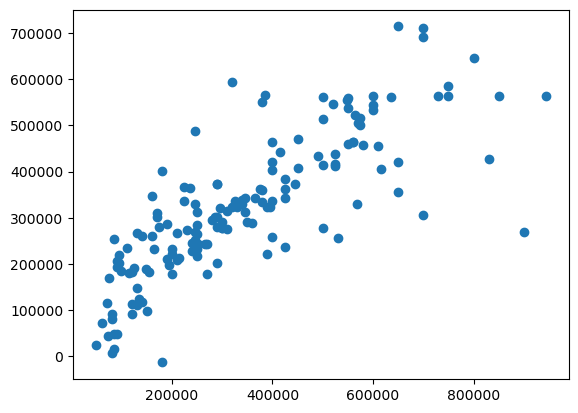

In [64]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='Price', ylabel='Count'>

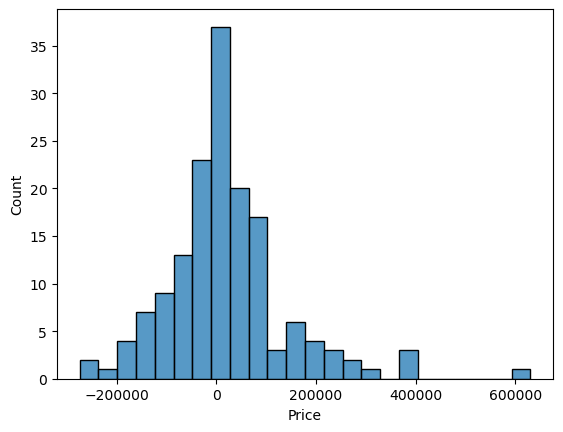

In [65]:
sns.histplot(residuals)

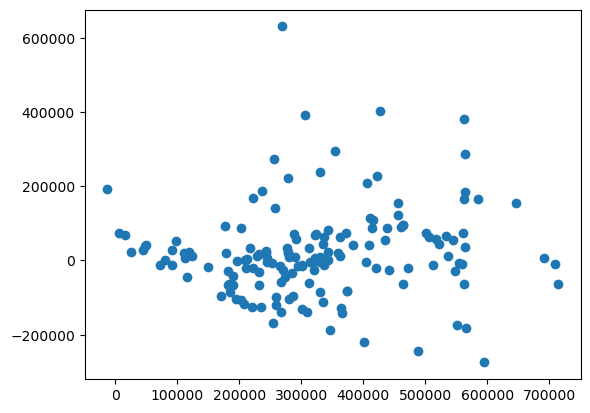

In [66]:
plt.scatter(y_pred,residuals)

In [67]:
pickle.dump(linear,open('Model.pkl','wb'))
pickle.dump(standard,open('standard.pkl','wb'))